# CASE - Candidate: Jaisa Orsolin Nichterwitz

# IMPORTANT INFORMATION:
- **Objective:** Maximize the profit of the next marketing campaign by targeting customers with the highest likelihood of responding.
- **Problem:** The previous campaign resulted in financial loss
- **Proposed solution:** Build a profit-oriented classification model based on Marketing data
- **Beyond the model:** It is also necessary to provide data-driven insights

The team aims to build a predictive model to maximize profit in the next direct marketing campaign. A pilot campaign with 2,240 randomly selected customers was conducted to collect training data, resulting in a 15% success rate and a financial loss. Based on these results, the goal is to predict customer behavior and target only high-probability responders in the full customer base, avoiding non-respondents and increasing campaign profitability.

# Insights and Data Treatment

Before moving on to model training, I spent some time understanding the data and exploring correlations to support the modeling phase.

In [0]:
tabela = spark.table("workspace.default.case_ifood")
display(tabela)

ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
965,1971,Graduation,Divorced,55635,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
6177,1985,PhD,Married,33454,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
4855,1974,PhD,Together,30351,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
5899,1950,PhD,Together,5648,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


**Points of attention:**
- Columns Z_CostContact and Z_Revenue they are equal for every customer and we don't have any information on the presented PDF, so I will not use them.

**Insights: Education Level**

As we can see in the charts presentend below in `CMD 7: Insights - GroupBy Education Level`
- The majority of customers have a **Graduation** education level, representing approximately **50%** of the customer base.
- Customer spending is influenced by education level: customers with **Graduation or higher education** tend to spend more per customer. However, average spending does not vary significantly between **Graduation, Master’s, and PhD** levels.
- Education level does not appear to significantly influence the preferred purchase channel. An exception is observed among customers with a **Basic** education level, who show a higher tendency to purchase **promotional items**.
- **Wine** is the product category with the highest overall spending, and average wine expenditure increases with higher education levels.
- A custom metric, **Campaign per Customer Ratio** (`total accepted campaigns / total customers`), was created to evaluate campaign engagement. This metric suggests that customers with higher education levels are more likely to accept campaigns, a relationship that will be further explored and validated during the modeling phase.

In [0]:
from pyspark.sql.functions import (
    countDistinct, sum, when, avg, col
)

result = (
    tabela
    .groupBy("Education")
    .agg(
        countDistinct("ID").alias("Total_Customers"),
        # CHANNELS
        sum(when(col("NumWebPurchases").isNotNull(), col("NumWebPurchases"))).alias("Web_purchases"),
        sum(when(col("NumStorePurchases").isNotNull(), col("NumStorePurchases"))).alias("Store_purchases"),
        sum(when(col("NumCatalogPurchases").isNotNull(), col("NumCatalogPurchases"))).alias("Catalog_purchases"),
        sum(when(col("NumDealsPurchases").isNotNull(), col("NumDealsPurchases"))).alias("Deals_purchases"),
        # PRODUCTS
        sum(when(col("MntWines").isNotNull(), col("MntWines"))).alias("Amount_Wines"),
        sum(when(col("MntFruits").isNotNull(), col("MntFruits"))).alias("Amount_Fruits"),
        sum(when(col("MntMeatProducts").isNotNull(), col("MntMeatProducts"))).alias("Amount_Meat"),
        sum(when(col("MntFishProducts").isNotNull(), col("MntFishProducts"))).alias("Amount_Fish"),
        sum(when(col("MntSweetProducts").isNotNull(), col("MntSweetProducts"))).alias("Amount_Sweet"),
        sum(when(col("MntGoldProds").isNotNull(), col("MntGoldProds"))).alias("Amount_Gold"),
        # CAMPAIGNS
        sum(when(col("AcceptedCmp1").isNotNull(), col("AcceptedCmp1"))).alias("Campain1"),
        sum(when(col("AcceptedCmp2").isNotNull(), col("AcceptedCmp2"))).alias("Campain2"),
        sum(when(col("AcceptedCmp3").isNotNull(), col("AcceptedCmp3"))).alias("Campain3"),
        sum(when(col("AcceptedCmp4").isNotNull(), col("AcceptedCmp4"))).alias("Campain4"),
        sum(when(col("AcceptedCmp5").isNotNull(), col("AcceptedCmp5"))).alias("Campain5"),
        # COMPLAINTS
        sum(when(col("Complain").isNotNull(), col("Complain"))).alias("Complaints"),
        # KIDS AND TEEN
        avg(when(col("Kidhome").isNotNull(), col("Kidhome"))).alias("Avg_Kids_Home"),
        avg(when(col("Teenhome").isNotNull(), col("Teenhome"))).alias("Avg_Teen_Home")
    )
)

result = (
    result
    .withColumn(
        "Total_Amount_Purchase",
        col("Amount_Wines") + col("Amount_Fruits") + col("Amount_Meat") +
        col("Amount_Fish") + col("Amount_Sweet") + col("Amount_Gold")
    )
    .withColumn(
        "Total_Itens_Purchase",
        col("Web_purchases") + col("Store_purchases") +
        col("Catalog_purchases") + col("Deals_purchases")
    )
    .withColumn(
        "Total_Campains",
        col("Campain1") + col("Campain2") + col("Campain3") +
        col("Campain4") + col("Campain5")
    )
    .withColumn(
        "Amount_per_Customer",
        col("Total_Amount_Purchase") / col("Total_Customers")
    )
    .withColumn(
        "Itens_per_Customer",
        col("Total_Itens_Purchase") / col("Total_Customers")
    )
    .withColumn(
        "Campain_per_Customer",
        col("Total_Campains") / col("Total_Customers")
    )
)

display(result)

Education,Total_Customers,Web_purchases,Store_purchases,Catalog_purchases,Deals_purchases,Amount_Wines,Amount_Fruits,Amount_Meat,Amount_Fish,Amount_Sweet,Amount_Gold,Campain1,Campain2,Campain3,Campain4,Campain5,Complaints,Avg_Kids_Home,Avg_Teen_Home,Total_Amount_Purchase,Total_Itens_Purchase,Total_Campains,Amount_per_Customer,Itens_per_Customer,Campain_per_Customer
Graduation,1127,4649,6570,3072,2603,320371,34683,202284,48630,35351,57307,82,16,78,81,86,14,0.4445430346051464,0.49423247559893524,698626,16894,343,619.8988464951198,14.990239574090506,0.30434782608695654
PhD,486,2150,2946,1443,1154,196585,9744,81941,12990,9828,15703,30,10,40,45,39,1,0.4012345679012346,0.5987654320987654,326791,7693,164,672.4094650205761,15.829218106995885,0.3374485596707819
Master,370,1492,2182,951,898,123238,8012,60450,11877,7835,14947,18,2,24,31,28,2,0.4540540540540541,0.5351351351351351,226359,5523,103,611.7810810810811,14.927027027027027,0.27837837837837837
Basic,54,102,154,26,97,391,600,618,921,654,1233,0,0,6,0,0,0,0.6296296296296297,0.09259259259259259,4417,379,6,81.79629629629629,7.018518518518518,0.1111111111111111
2n Cycle,203,757,1118,471,456,40231,5878,28675,9639,6953,9419,14,2,15,10,10,4,0.47783251231527096,0.4088669950738916,100795,2802,51,496.5270935960591,13.80295566502463,0.2512315270935961


Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

**Insights: Marital Status**

As we can see in the charts presentend in `CMD 9: Insights - GroupBy Marital Status`
- Customers are relatively well distributed across marital status categories, with a higher concentration of **Married** and **Together** individuals.
- Average spending per customer does not show a strong relationship with marital status, indicating similar purchasing behavior across groups.
- Marital status also does not appear to significantly influence the **Campaign per Customer Ratio**, suggesting that campaign acceptance is not driven by relationship status alone.

In [0]:
from pyspark.sql.functions import (
    countDistinct, sum, when, avg, col
)

result = (
    tabela
    .groupBy("Marital_Status")
    .agg(
        countDistinct("ID").alias("Total_Customers"),
        # CHANNELS
        sum(when(col("NumWebPurchases").isNotNull(), col("NumWebPurchases"))).alias("Web_purchases"),
        sum(when(col("NumStorePurchases").isNotNull(), col("NumStorePurchases"))).alias("Store_purchases"),
        sum(when(col("NumCatalogPurchases").isNotNull(), col("NumCatalogPurchases"))).alias("Catalog_purchases"),
        sum(when(col("NumDealsPurchases").isNotNull(), col("NumDealsPurchases"))).alias("Deals_purchases"),
        # PRODUCTS
        sum(when(col("MntWines").isNotNull(), col("MntWines"))).alias("Amount_Wines"),
        sum(when(col("MntFruits").isNotNull(), col("MntFruits"))).alias("Amount_Fruits"),
        sum(when(col("MntMeatProducts").isNotNull(), col("MntMeatProducts"))).alias("Amount_Meat"),
        sum(when(col("MntFishProducts").isNotNull(), col("MntFishProducts"))).alias("Amount_Fish"),
        sum(when(col("MntSweetProducts").isNotNull(), col("MntSweetProducts"))).alias("Amount_Sweet"),
        sum(when(col("MntGoldProds").isNotNull(), col("MntGoldProds"))).alias("Amount_Gold"),
        # CAMPAIGNS
        sum(when(col("AcceptedCmp1").isNotNull(), col("AcceptedCmp1"))).alias("Campain1"),
        sum(when(col("AcceptedCmp2").isNotNull(), col("AcceptedCmp2"))).alias("Campain2"),
        sum(when(col("AcceptedCmp3").isNotNull(), col("AcceptedCmp3"))).alias("Campain3"),
        sum(when(col("AcceptedCmp4").isNotNull(), col("AcceptedCmp4"))).alias("Campain4"),
        sum(when(col("AcceptedCmp5").isNotNull(), col("AcceptedCmp5"))).alias("Campain5"),
        # COMPLAINTS
        sum(when(col("Complain").isNotNull(), col("Complain"))).alias("Complaints"),
        # KIDS AND TEEN
        avg(when(col("Kidhome").isNotNull(), col("Kidhome"))).alias("Avg_Kids_Home"),
        avg(when(col("Teenhome").isNotNull(), col("Teenhome"))).alias("Avg_Teen_Home")
    )
)

result = (
    result
    .withColumn(
        "Total_Amount_Purchase",
        col("Amount_Wines") + col("Amount_Fruits") + col("Amount_Meat") +
        col("Amount_Fish") + col("Amount_Sweet") + col("Amount_Gold")
    )
    .withColumn(
        "Total_Itens_Purchase",
        col("Web_purchases") + col("Store_purchases") +
        col("Catalog_purchases") + col("Deals_purchases")
    )
    .withColumn(
        "Total_Campains",
        col("Campain1") + col("Campain2") + col("Campain3") +
        col("Campain4") + col("Campain5")
    )
    .withColumn(
        "Amount_per_Customer",
        col("Total_Amount_Purchase") / col("Total_Customers")
    )
    .withColumn(
        "Itens_per_Customer",
        col("Total_Itens_Purchase") / col("Total_Customers")
    )
    .withColumn(
        "Campain_per_Customer",
        col("Total_Campains") / col("Total_Customers")
    )
)

display(result)

Marital_Status,Total_Customers,Web_purchases,Store_purchases,Catalog_purchases,Deals_purchases,Amount_Wines,Amount_Fruits,Amount_Meat,Amount_Fish,Amount_Sweet,Amount_Gold,Campain1,Campain2,Campain3,Campain4,Campain5,Complaints,Avg_Kids_Home,Avg_Teen_Home,Total_Amount_Purchase,Total_Itens_Purchase,Total_Campains,Amount_per_Customer,Itens_per_Customer,Campain_per_Customer
Single,480,1859,2707,1248,1023,138399,12881,87412,18344,13086,20990,31,5,38,33,31,6,0.46458333333333335,0.40625,291112,6837,138,606.4833333333333,14.24375,0.2875
Together,580,2367,3327,1552,1348,177959,14703,97500,22615,15151,24937,32,12,37,43,44,5,0.45,0.5293103448275862,352865,8594,168,608.3879310344828,14.817241379310344,0.2896551724137931
Married,864,3532,5055,2268,2067,258751,22235,138829,30569,23070,36999,63,7,63,63,66,8,0.45601851851851855,0.5115740740740741,510453,12922,262,590.8020833333334,14.956018518518519,0.30324074074074076
Divorced,232,1000,1350,620,565,75364,6363,34848,8130,6222,10739,12,5,20,18,13,2,0.41379310344827586,0.5905172413793104,141666,3535,68,610.6293103448276,15.237068965517242,0.29310344827586204
Widow,77,356,494,256,180,28434,2548,14575,3957,3004,4371,5,1,4,10,8,0,0.23376623376623376,0.6363636363636364,56889,1286,28,738.8181818181819,16.7012987012987,0.36363636363636365
Alone,3,15,12,2,11,554,12,79,23,21,81,0,0,1,0,0,0,1.0,0.6666666666666666,770,40,1,256.6666666666667,13.333333333333334,0.3333333333333333
Absurd,2,7,13,15,4,711,169,625,411,61,408,1,0,0,0,1,0,0.0,0.0,2385,39,2,1192.5,19.5,1.0
YOLO,2,14,12,2,10,644,6,100,8,6,84,0,0,0,0,0,0,0.0,1.0,848,38,0,424.0,19.0,0.0


Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

In [0]:
################# CODE TO UNDERSTAND THE INCOME DISTRIBUTION IN ORDER TO CREATE BUCKETS AND ANALYZE THE DATA ################

quantiles = tabela.filter(
    col("Income").isNotNull()
).stat.approxQuantile(
    "Income",
    [0.25, 0.50, 0.75],
    0.01
)

p25 = round(quantiles[0])
p50 = round(quantiles[1])
p75 = round(quantiles[2])

dfFinal = tabela.withColumn(
    "income_group",
    when(col("Income").isNull(), None)
    .when(col("Income") < p25, f"< {p25}")
    .when(col("Income") < p50, f"{p25} – {p50}")
    .when(col("Income") < p75, f"{p50} – {p75}")
    .otherwise(f"> {p75}")
)

result = dfFinal.groupBy("income_group").count().orderBy("income_group")
display(result)

income_group,count
null,24
35684 – 51369,542
51369 – 67716,537
< 35684,563
> 67716,574


**Insights: Income Groups**

As we can see in the charts presentend in `CMD 12: Insights - GroupBy Income`

- Customers are relatively well distributed across the defined income segments, ensuring adequate representation across income levels.
- As expected, **higher-income customers exhibit significantly higher average spending per customer**, with spending increasing consistently as income rises.
- The **Campaign per Customer Ratio** also shows a clear positive relationship with income, indicating that higher-income customers are more likely to accept marketing campaigns.

In [0]:
from pyspark.sql.functions import (
    countDistinct, sum, when, avg, col
)

result = (
    tabela
    .withColumn(
        "Income_Group",
        when(col("Income").isNull(), lit(None))
        .when(col("Income") < 35000, "< 35k")
        .when((col("Income") >= 35000) & (col("Income") < 51000), "Between 35 and 51k")
        .when((col("Income") >= 51000) & (col("Income") < 70000), "Between 51 and 70k")
        .otherwise("Higher than 70k")
    ) ## arredondei os números de income de acordo com a tabela do CMD acima
    .groupBy("Income_Group")
    .agg(
        # CUSTOMERS
        countDistinct("ID").alias("Total_Customers"),
        countDistinct(when(col("Education") == "2n Cycle", col("ID"))).alias("2n Cycle Customers"),
        countDistinct(when(col("Education") == "Basic", col("ID"))).alias("Basic Customers"),
        countDistinct(when(col("Education") == "Graduation", col("ID"))).alias("Graduation Customers"),
        countDistinct(when(col("Education") == "Master", col("ID"))).alias("Master Customers"),
        countDistinct(when(col("Education") == "PhD", col("ID"))).alias("PhD Customers"),
        # CHANNELS
        sum(when(col("NumWebPurchases").isNotNull(), col("NumWebPurchases"))).alias("Web_purchases"),
        sum(when(col("NumStorePurchases").isNotNull(), col("NumStorePurchases"))).alias("Store_purchases"),
        sum(when(col("NumCatalogPurchases").isNotNull(), col("NumCatalogPurchases"))).alias("Catalog_purchases"),
        sum(when(col("NumDealsPurchases").isNotNull(), col("NumDealsPurchases"))).alias("Deals_purchases"),
        # PRODUCTS
        sum(when(col("MntWines").isNotNull(), col("MntWines"))).alias("Amount_Wines"),
        sum(when(col("MntFruits").isNotNull(), col("MntFruits"))).alias("Amount_Fruits"),
        sum(when(col("MntMeatProducts").isNotNull(), col("MntMeatProducts"))).alias("Amount_Meat"),
        sum(when(col("MntFishProducts").isNotNull(), col("MntFishProducts"))).alias("Amount_Fish"),
        sum(when(col("MntSweetProducts").isNotNull(), col("MntSweetProducts"))).alias("Amount_Sweet"),
        sum(when(col("MntGoldProds").isNotNull(), col("MntGoldProds"))).alias("Amount_Gold"),
        # CAMPAIGNS
        sum(when(col("AcceptedCmp1").isNotNull(), col("AcceptedCmp1"))).alias("Campain1"),
        sum(when(col("AcceptedCmp2").isNotNull(), col("AcceptedCmp2"))).alias("Campain2"),
        sum(when(col("AcceptedCmp3").isNotNull(), col("AcceptedCmp3"))).alias("Campain3"),
        sum(when(col("AcceptedCmp4").isNotNull(), col("AcceptedCmp4"))).alias("Campain4"),
        sum(when(col("AcceptedCmp5").isNotNull(), col("AcceptedCmp5"))).alias("Campain5"),
        # COMPLAINTS
        sum(when(col("Complain").isNotNull(), col("Complain"))).alias("Complaints"),
        # KIDS AND TEEN
        avg(when(col("Kidhome").isNotNull(), col("Kidhome"))).alias("Avg_Kids_Home"),
        avg(when(col("Teenhome").isNotNull(), col("Teenhome"))).alias("Avg_Teen_Home")
    )
)

result = (
    result
    .withColumn(
        "Total_Amount_Purchase",
        col("Amount_Wines") + col("Amount_Fruits") + col("Amount_Meat") +
        col("Amount_Fish") + col("Amount_Sweet") + col("Amount_Gold")
    )
    .withColumn(
        "Total_Itens_Purchase",
        col("Web_purchases") + col("Store_purchases") +
        col("Catalog_purchases") + col("Deals_purchases")
    )
    .withColumn(
        "Total_Campains",
        col("Campain1") + col("Campain2") + col("Campain3") +
        col("Campain4") + col("Campain5")
    )
    .withColumn(
        "Amount_per_Customer",
        col("Total_Amount_Purchase") / col("Total_Customers")
    )
    .withColumn(
        "Itens_per_Customer",
        col("Total_Itens_Purchase") / col("Total_Customers")
    )
    .withColumn(
        "Campain_per_Customer",
        col("Total_Campains") / col("Total_Customers")
    )
)

display(result)

Income_Group,Total_Customers,2n Cycle Customers,Basic Customers,Graduation Customers,Master Customers,PhD Customers,Web_purchases,Store_purchases,Catalog_purchases,Deals_purchases,Amount_Wines,Amount_Fruits,Amount_Meat,Amount_Fish,Amount_Sweet,Amount_Gold,Campain1,Campain2,Campain3,Campain4,Campain5,Complaints,Avg_Kids_Home,Avg_Teen_Home,Total_Amount_Purchase,Total_Itens_Purchase,Total_Campains,Amount_per_Customer,Itens_per_Customer,Campain_per_Customer
Between 51 and 70k,615,47,0,296,101,171,3459,4726,2079,1811,271663,19405,106201,25946,18074,36162,20,10,29,67,13,5,0.23089430894308943,0.7804878048780488,477451,12075,139,776.3430894308943,19.634146341463413,0.22601626016260162
Between 35 and 51k,544,46,0,256,115,127,1827,2288,624,1503,67036,4293,25987,7320,4651,15138,4,4,50,22,0,9,0.6654411764705882,0.6764705882352942,124425,6242,80,228.72242647058823,11.474264705882353,0.14705882352941177
Higher than 70k,508,40,0,278,79,111,2669,4218,2957,711,325677,31445,225638,45430,33973,37212,118,16,43,74,149,2,0.08070866141732283,0.265748031496063,699375,10555,400,1376.7224409448818,20.77755905511811,0.7874015748031497
< 35k,549,67,54,286,70,72,1098,1623,259,1124,11707,3262,12237,4709,3198,8915,0,0,41,1,0,5,0.7905282331511839,0.2495446265938069,44028,4104,42,80.19672131147541,7.475409836065574,0.07650273224043716
null,24,3,0,11,5,5,97,115,44,59,4733,512,3905,652,725,1182,2,0,0,3,1,0,0.6666666666666666,0.5833333333333334,11709,315,6,487.875,13.125,0.25


Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

In [0]:
################# CODE TO UNDERSTAND THE AGE DISTRIBUTION IN ORDER TO CREATE BUCKETS AND ANALYZE THE DATA ################

from pyspark.sql.functions import (
    year, current_date, col, when, lit
)

dfComIdade = tabela.withColumn(
    "idade",
    year(current_date()) - col("Year_Birth")
)

dfFinal = dfComIdade.withColumn(
    "faixa_etaria",
    when(col("Year_Birth").isNull(), None)
    .when(col("idade") < 25, "< 25")
    .when(col("idade") < 35, "25 – 34")
    .when(col("idade") < 45, "35 – 44")
    .when(col("idade") < 55, "45 – 54")
    .otherwise("55+")
)

result = dfFinal.groupBy("faixa_etaria").count().orderBy("faixa_etaria")
display(result)

faixa_etaria,count
25 – 34,43
35 – 44,342
45 – 54,702
55+,1153


**Insights: Age Groups**

As we can see in the charts presentend in `CMD 15: Insights - GroupBy Age Group`

- The majority of customers belong to the **55+ age group**, representing the largest share of the customer base.
- While a smaller group of customers aged **25 to 34** shows higher average spending, overall **age does not appear to have a strong correlation with customer behavior or spending patterns**.

In [0]:
from pyspark.sql.functions import (
    year, current_date, col, when, lit
)

dfComIdade = tabela.withColumn(
    "idade",
    year(current_date()) - col("Year_Birth")
)

dfFinal = dfComIdade.withColumn(
    "faixa_etaria",
    when(col("Year_Birth").isNull(), None)
    .when(col("idade") < 25, "< 25")
    .when(col("idade") < 35, "25 – 34")
    .when(col("idade") < 45, "35 – 44")
    .when(col("idade") < 55, "45 – 54")
    .otherwise("55+")
)

result = (
    dfFinal
    .groupBy("faixa_etaria")
    .agg(
        #CUSTOMERS
        countDistinct("ID").alias("Total_Customers"),
        countDistinct(when(col("Education") == "2n Cycle", col("ID"))).alias("2n Cycle Customers"),
        countDistinct(when(col("Education") == "Basic", col("ID"))).alias("Basic Customers"),
        countDistinct(when(col("Education") == "Graduation", col("ID"))).alias("Graduation Customers"),
        countDistinct(when(col("Education") == "Master", col("ID"))).alias("Master Customers"),
        countDistinct(when(col("Education") == "PhD", col("ID"))).alias("PhD Customers"),
        # CHANNELS
        sum(when(col("NumWebPurchases").isNotNull(), col("NumWebPurchases"))).alias("Web_purchases"),
        sum(when(col("NumStorePurchases").isNotNull(), col("NumStorePurchases"))).alias("Store_purchases"),
        sum(when(col("NumCatalogPurchases").isNotNull(), col("NumCatalogPurchases"))).alias("Catalog_purchases"),
        sum(when(col("NumDealsPurchases").isNotNull(), col("NumDealsPurchases"))).alias("Deals_purchases"),
        # PRODUCTS
        sum(when(col("MntWines").isNotNull(), col("MntWines"))).alias("Amount_Wines"),
        sum(when(col("MntFruits").isNotNull(), col("MntFruits"))).alias("Amount_Fruits"),
        sum(when(col("MntMeatProducts").isNotNull(), col("MntMeatProducts"))).alias("Amount_Meat"),
        sum(when(col("MntFishProducts").isNotNull(), col("MntFishProducts"))).alias("Amount_Fish"),
        sum(when(col("MntSweetProducts").isNotNull(), col("MntSweetProducts"))).alias("Amount_Sweet"),
        sum(when(col("MntGoldProds").isNotNull(), col("MntGoldProds"))).alias("Amount_Gold"),
        # CAMPAIGNS
        sum(when(col("AcceptedCmp1").isNotNull(), col("AcceptedCmp1"))).alias("Campain1"),
        sum(when(col("AcceptedCmp2").isNotNull(), col("AcceptedCmp2"))).alias("Campain2"),
        sum(when(col("AcceptedCmp3").isNotNull(), col("AcceptedCmp3"))).alias("Campain3"),
        sum(when(col("AcceptedCmp4").isNotNull(), col("AcceptedCmp4"))).alias("Campain4"),
        sum(when(col("AcceptedCmp5").isNotNull(), col("AcceptedCmp5"))).alias("Campain5"),
        # COMPLAINTS
        sum(when(col("Complain").isNotNull(), col("Complain"))).alias("Complaints"),
        # KIDS AND TEEN
        avg(when(col("Kidhome").isNotNull(), col("Kidhome"))).alias("Avg_Kids_Home"),
        avg(when(col("Teenhome").isNotNull(), col("Teenhome"))).alias("Avg_Teen_Home")
    )
)

result = (
    result
    .withColumn(
        "Total_Amount_Purchase",
        col("Amount_Wines") + col("Amount_Fruits") + col("Amount_Meat") +
        col("Amount_Fish") + col("Amount_Sweet") + col("Amount_Gold")
    )
    .withColumn(
        "Total_Itens_Purchase",
        col("Web_purchases") + col("Store_purchases") +
        col("Catalog_purchases") + col("Deals_purchases")
    )
    .withColumn(
        "Total_Campains",
        col("Campain1") + col("Campain2") + col("Campain3") +
        col("Campain4") + col("Campain5")
    )
    .withColumn(
        "Amount_per_Customer",
        col("Total_Amount_Purchase") / col("Total_Customers")
    )
    .withColumn(
        "Itens_per_Customer",
        col("Total_Itens_Purchase") / col("Total_Customers")
    )
    .withColumn(
        "Campain_per_Customer",
        col("Total_Campains") / col("Total_Customers")
    )
)

display(result)

faixa_etaria,Total_Customers,2n Cycle Customers,Basic Customers,Graduation Customers,Master Customers,PhD Customers,Web_purchases,Store_purchases,Catalog_purchases,Deals_purchases,Amount_Wines,Amount_Fruits,Amount_Meat,Amount_Fish,Amount_Sweet,Amount_Gold,Campain1,Campain2,Campain3,Campain4,Campain5,Complaints,Avg_Kids_Home,Avg_Teen_Home,Total_Amount_Purchase,Total_Itens_Purchase,Total_Campains,Amount_per_Customer,Itens_per_Customer,Campain_per_Customer
55+,1153,73,12,564,215,289,5150,7176,3469,2788,411139,32089,203389,46139,32331,55370,78,19,67,106,81,11,0.31743278404163056,0.6886383347788378,780457,18583,351,676.8924544666088,16.117085862966174,0.3044232437120555
35 – 44,342,45,16,181,44,56,1170,1764,744,609,80597,9305,57279,12736,9160,13720,28,4,39,19,37,4,0.6023391812865497,0.029239766081871343,182797,4287,127,534.4941520467836,12.535087719298245,0.3713450292397661
45 – 54,702,79,20,358,107,138,2673,3763,1566,1745,172196,15810,99388,22487,17338,26646,33,6,53,38,36,5,0.5954415954415955,0.4700854700854701,353865,9747,166,504.0811965811966,13.884615384615385,0.23646723646723647
25 – 34,43,6,6,24,4,3,157,267,184,66,16884,1713,13912,2695,1792,2873,5,1,4,4,9,1,0.11627906976744186,0.0,39869,674,23,927.1860465116279,15.674418604651162,0.5348837209302325


Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

# Prediction Model

**Model objective:** Predict the probability that a customer will respond positively to the marketing campaign.

## Step 1: Import libraries, explore the features, and prepare the data.

In [0]:
%pip install imbalanced-learn
%pip install shap
%pip install xgboost

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
%restart_python

In [0]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import shap
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)
import shap
import matplotlib.pyplot as plt
import seaborn as sns

**Important Information**

Prior to modeling, the dataset was cleaned and prepared to ensure data quality and modeling suitability (`CMD 22: Table Data Treatment`):
- **Income:** missing values were filled with the median.
- **Marital Status:** some categories do not make sense (e.g., YOLO, Absurd, Alone), so they were grouped as Single.
- **Feature selection:** The **Age Group** and **Income Group** features created during the exploratory analysis were not used in the model to avoid redundancy, as their underlying information is already captured by numerical age and income variables.
- **Encoding:** Categorical variables such as **Marital Status** and **Education Level** were transformed into numerical features using **One-Hot Encoding**.

In [0]:
from pyspark.sql.functions import (
    year, current_date, col, when, lit
)

dfComIdade = tabela.withColumn(
    "idade",
    year(current_date()) - col("Year_Birth")
)

# Income median
median_income = (
    dfComIdade
    .select("Income")
    .dropna()
    .approxQuantile("Income", [0.5], 0.01)[0]
)

# fill up null incomes
dfFilled = (
    dfComIdade
    .withColumn(
        "Income_filled",
        when(col("Income").isNull(), lit(median_income))
        .otherwise(col("Income"))
    )
)

# clena up marital status
dfClean = (
    dfFilled
    .withColumn(
        "Marital_Status_Clean",
        when(col("Marital_Status").isin("Alone", "YOLO", "Absurd"), "Single")
        .otherwise(col("Marital_Status"))
    )
)

# groups just to check the charts.. but not going to use in model training
dfFinal = (
    dfClean
    .withColumn(
        "Age_Group",
        when(col("Year_Birth").isNull(), lit(None))
        .when(col("idade") < 25, "< 25")
        .when(col("idade") < 35, "25 – 34")
        .when(col("idade") < 45, "35 – 44")
        .when(col("idade") < 55, "45 – 54")
        .otherwise("55+")
    )
    .withColumn(
        "Income_Group",
        when(col("Income_filled") < 35000, "< 35k")
        .when(col("Income_filled") < 51000, "Between 35 and 51k")
        .when(col("Income_filled") < 70000, "Between 51 and 70k")
        .otherwise("Higher than 70k")
    )
)

# one-hot encoding
marital_dummies = (
    dfFinal
    .groupBy("ID")
    .pivot("Marital_Status_Clean")
    .agg(lit(1))
    .fillna(0)
)

education_dummies = (
    dfFinal
    .groupBy("ID")
    .pivot("Education")
    .agg(lit(1))
    .fillna(0)
)

dfModel = (
    dfFinal
    .join(marital_dummies, on="ID", how="left")
    .join(education_dummies, on="ID", how="left")
)

# panda
dfModel_pd = dfModel.toPandas()


In [0]:
dfModel_pd.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,idade,Income_filled,Marital_Status_Clean,Age_Group,Income_Group,Divorced,Married,Single,Together,Widow,2n Cycle,Basic,Graduation,Master,PhD
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,68,58138.0,Single,55+,Between 51 and 70k,0,0,1,0,0,0,0,1,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,71,46344.0,Single,55+,Between 35 and 51k,0,0,1,0,0,0,0,1,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,60,71613.0,Together,55+,Higher than 70k,0,0,0,1,0,0,0,1,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,41,26646.0,Together,35 – 44,< 35k,0,0,0,1,0,0,0,1,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,44,58293.0,Married,35 – 44,Between 51 and 70k,0,1,0,0,0,0,0,0,0,1


## Step 2: Exploratory analysis and assessment of target impact on features

In [0]:
## Response = Target!
f_df = dfModel_pd[[
    'ID','Response','Dt_Customer','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5','Complain',
    'Age_Group','Education','Marital_Status_Clean', 'Income_Group', 'Income_filled',
    'Kidhome','Teenhome','MntFishProducts','MntMeatProducts',
    'MntFruits','MntSweetProducts','MntWines','MntGoldProds',
    'NumDealsPurchases','NumCatalogPurchases','NumStorePurchases',
    'NumWebPurchases','NumWebVisitsMonth','Recency']]

**Data Quality Check**
- Before training the model, it is important to verify whether the dataset still contains missing values.
- Ensuring that all features are free of null values helps prevent unexpected behavior during model training and guarantees that the evaluation results are reliable.

In [0]:
f_df.isnull().sum(axis = 0)

ID                      0
Response                0
Dt_Customer             0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
Complain                0
Age_Group               0
Education               0
Marital_Status_Clean    0
Income_Group            0
Income_filled           0
Kidhome                 0
Teenhome                0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntSweetProducts        0
MntWines                0
MntGoldProds            0
NumDealsPurchases       0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebPurchases         0
NumWebVisitsMonth       0
Recency                 0
dtype: int64

**Categorical Features:**
- The CMD below shows the grouped distribution of categorical features by **Response**. For these visualizations, **Age Group** and **Income Group** were used.
- When analyzing both income-related charts (grouped and non-grouped), a clear pattern emerges: **customers with higher income levels show a higher likelihood of accepting the campaign**.
- This behavior is consistent with the insights presented earlier, particularly the **Campaign per Customer Ratio** segmented by Income Group, reinforcing income as a key driver of campaign response.

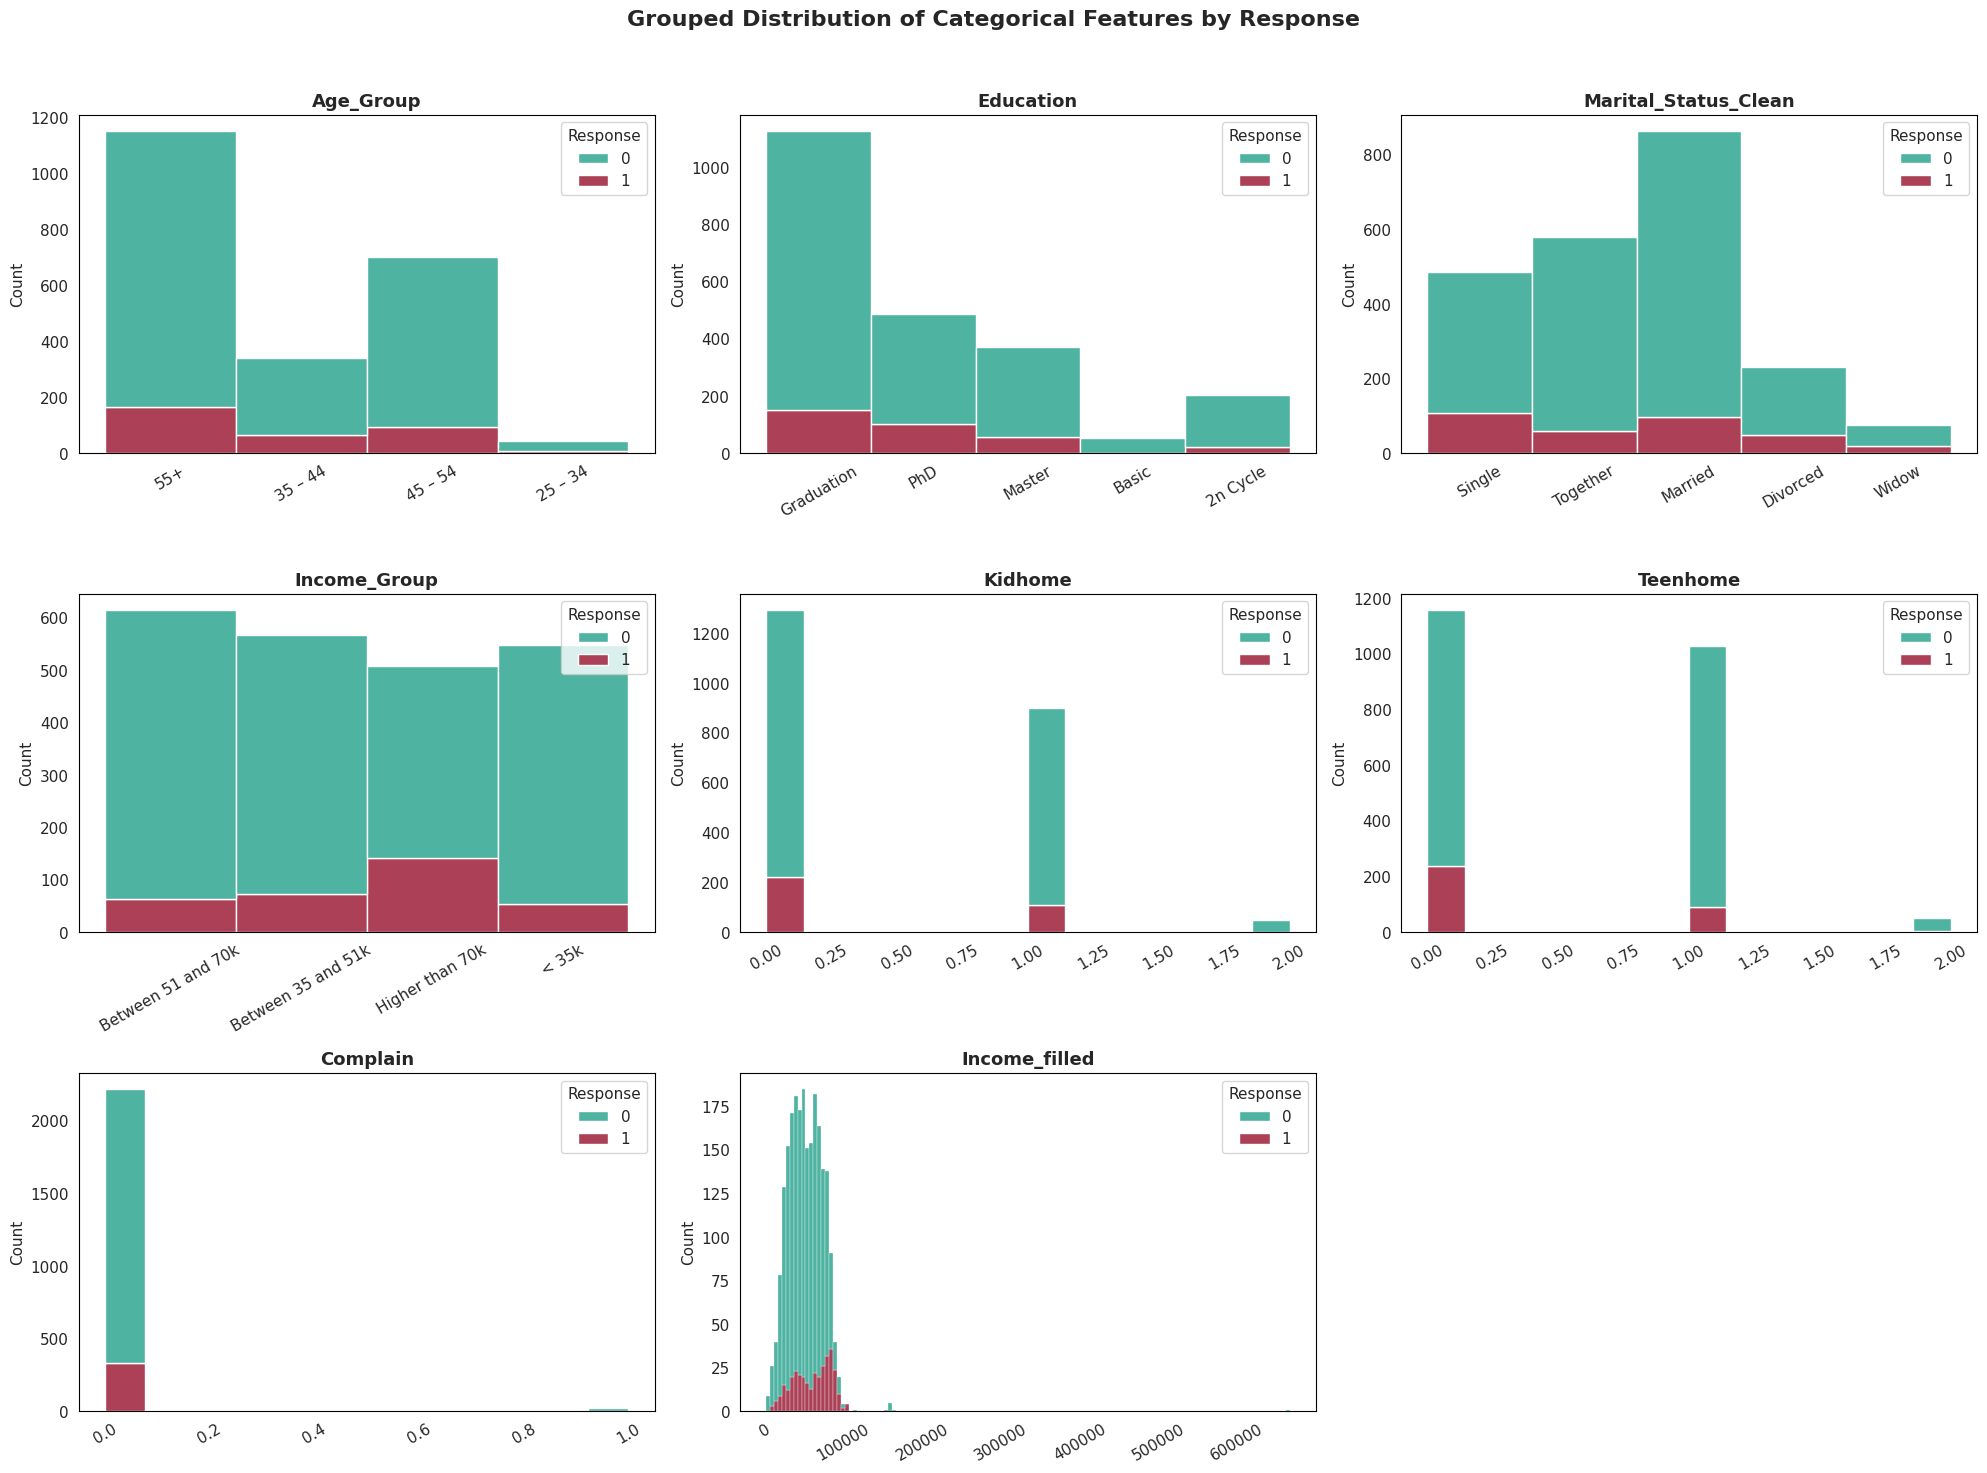

In [0]:
sns.set_style("white")

mpl.rcParams.update({
    "font.family": "sans-serif",
    "font.size": 11,
    "axes.titlesize": 13,
    "axes.labelsize": 11,
    "axes.edgecolor": "black",
    "axes.linewidth": 0.8
})

cols_to_plot = [
    "Age_Group",
    "Education",
    "Marital_Status_Clean",
    "Income_Group",
    "Kidhome",
    "Teenhome",
    "Complain",
    "Income_filled"
]

palette_ifood = {
    0: "#4FB3A2",  # Response = 0
    1: "#AB4057"   # Response = 1
}

n_cols = 3
n_rows = math.ceil(len(cols_to_plot) / n_cols)

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(20, 5 * n_rows)
)

axes = axes.flatten()

for ax, col_name in zip(axes, cols_to_plot):
    sns.histplot(
        data=f_df,
        x=col_name,
        hue="Response",
        stat="count",
        multiple="stack",   # 🔑 empilha
        alpha=1,            # 🔑 evita mistura de cores
        palette=palette_ifood,
        ax=ax
    )

    ax.set_title(col_name, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("Count")

    ax.tick_params(axis="x", rotation=30)

    for spine in ax.spines.values():
        spine.set_visible(True)

# remove eixos vazios
for ax in axes[len(cols_to_plot):]:
    ax.remove()

plt.suptitle(
    "Grouped Distribution of Categorical Features by Response",
    fontsize=16,
    fontweight="bold"
)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Numerical Features:**
- The CMD below presents the grouped distribution of numerical features by **Response**.
- A clear relationship can be observed between **Recency** and campaign response: customers with **lower recency values** (i.e., more recent purchases) are significantly more likely to respond positively to the campaign compared to customers with higher recency values.

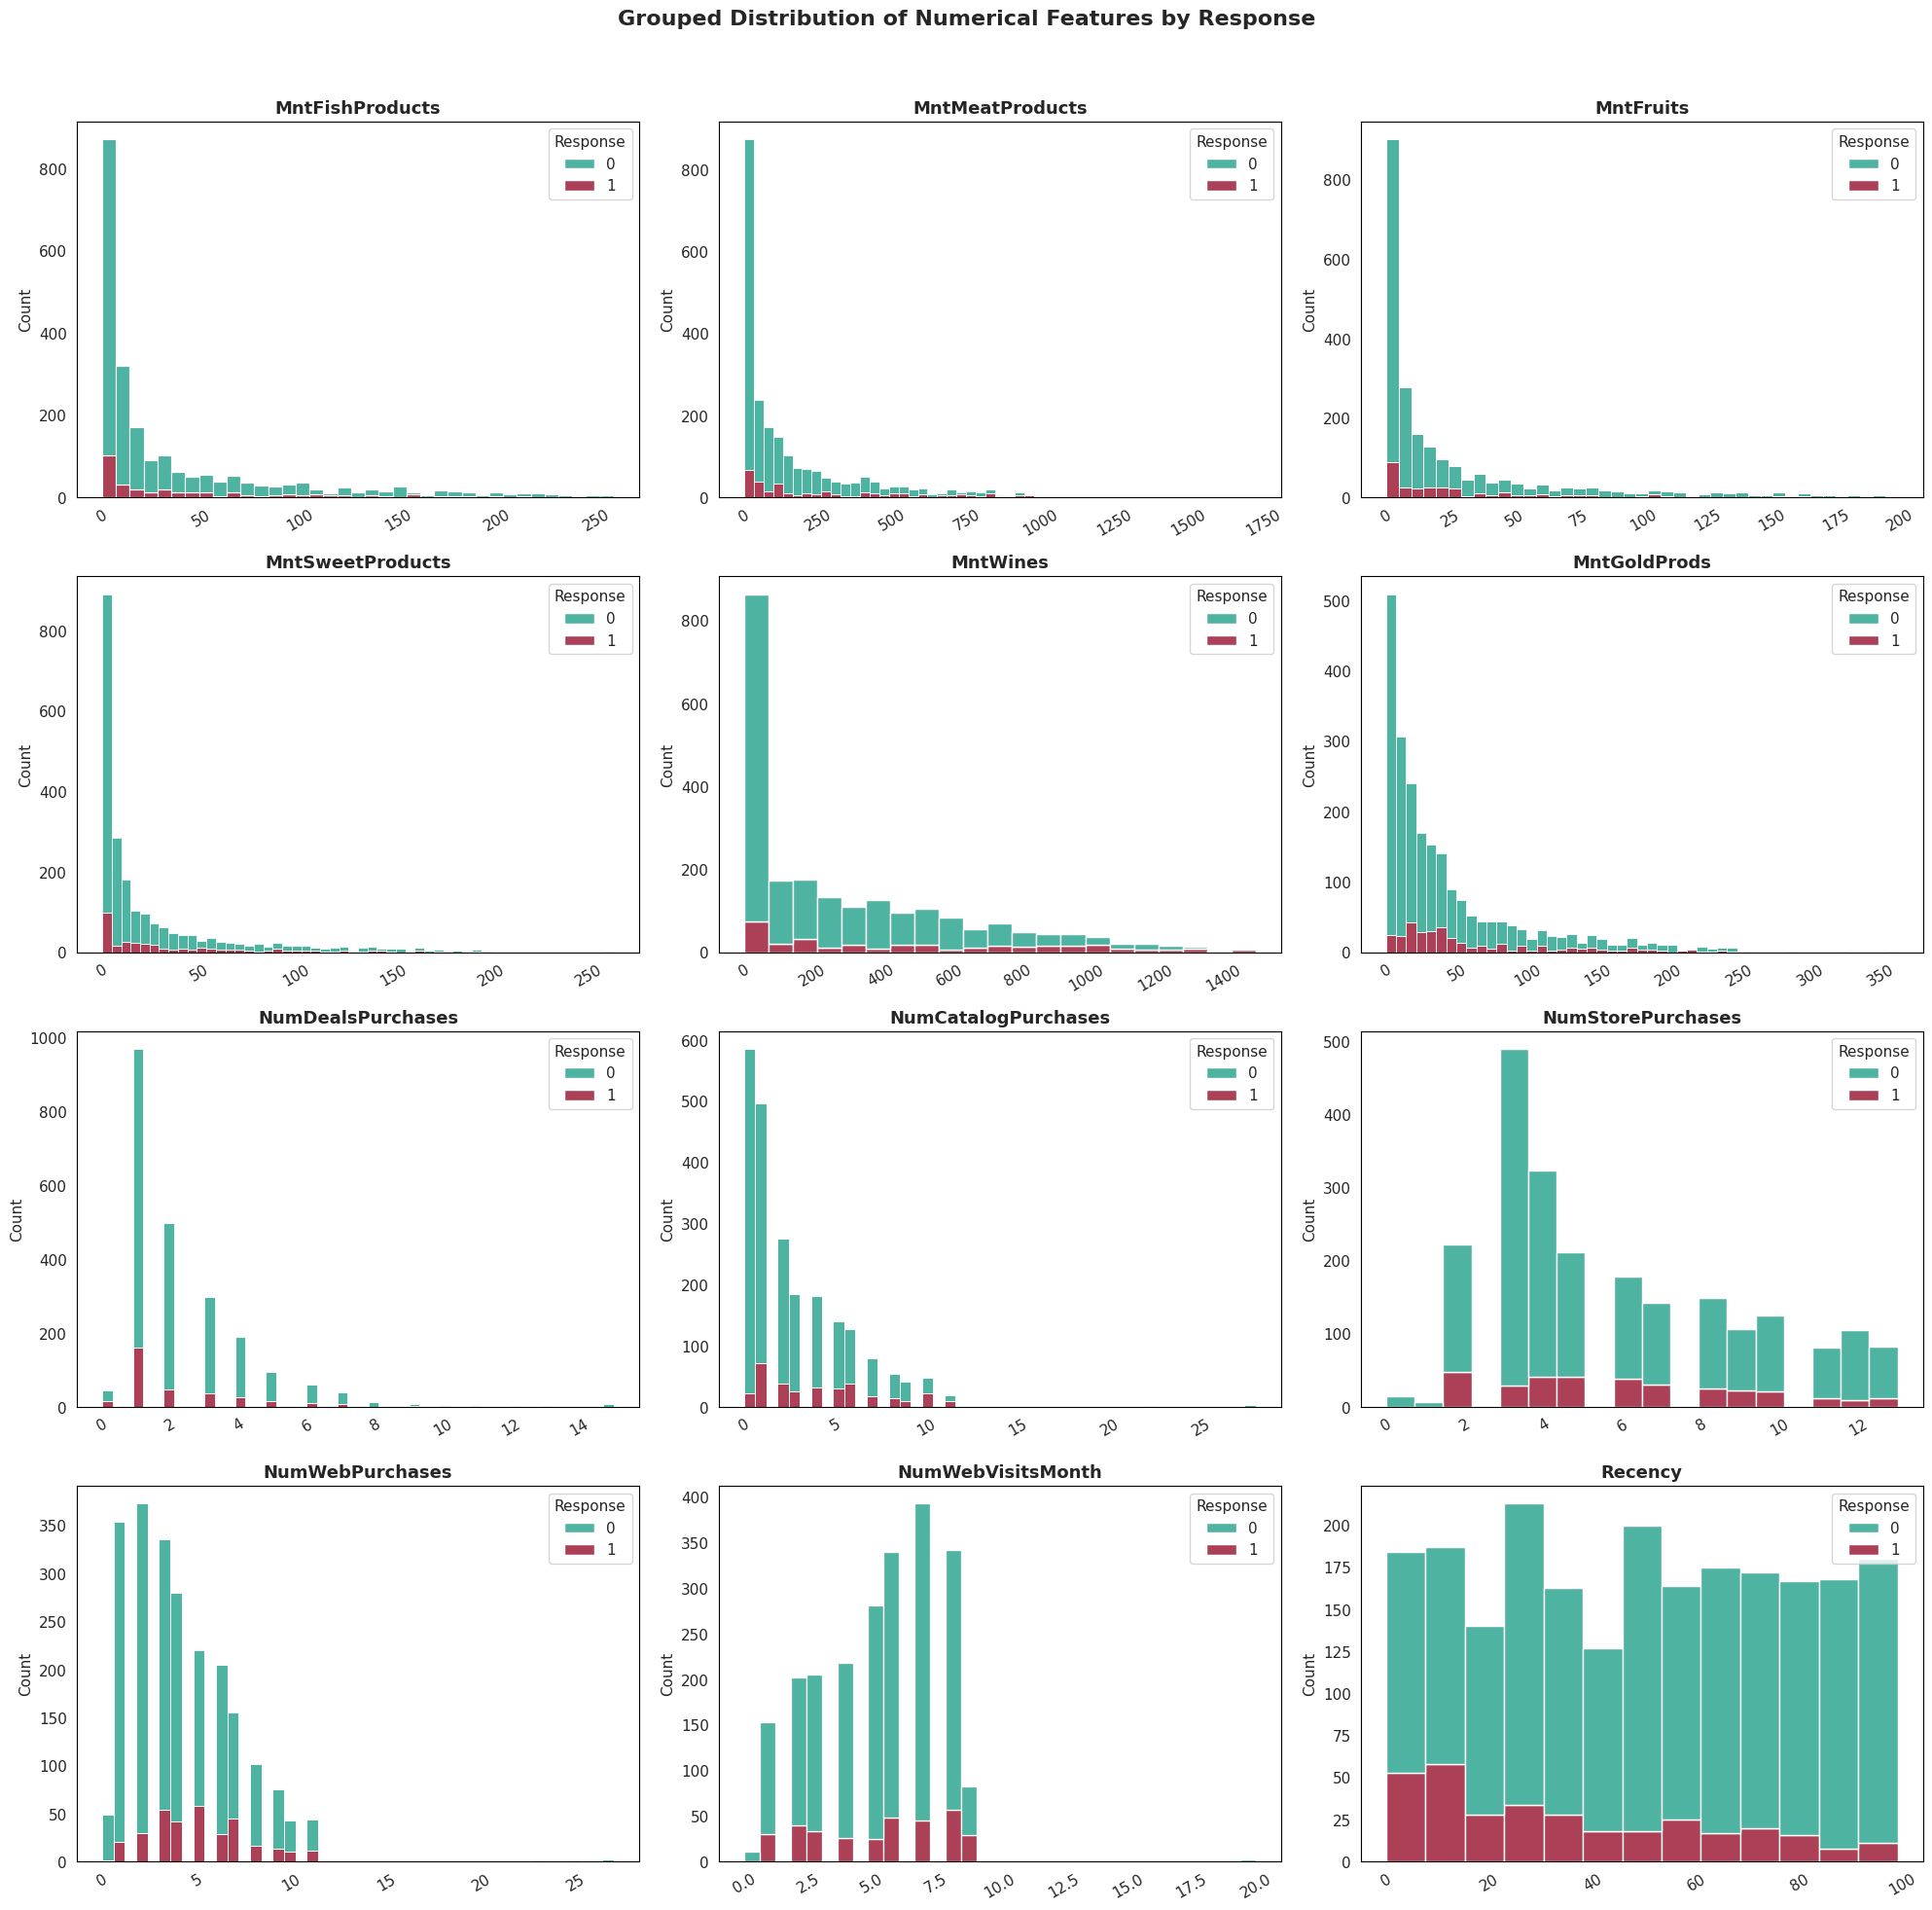

In [0]:
sns.set_style("white")

mpl.rcParams.update({
    "font.family": "sans-serif",
    "font.size": 11,
    "axes.titlesize": 13,
    "axes.labelsize": 11,
    "axes.edgecolor": "black",
    "axes.linewidth": 0.8
})


cols_to_plot = [
    "MntFishProducts",
    "MntMeatProducts",
    "MntFruits",
    "MntSweetProducts",
    "MntWines",
    "MntGoldProds",
    "NumDealsPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebPurchases",
    "NumWebVisitsMonth",
    "Recency"
]

palette_ifood = {
    0: "#4FB3A2",  # Response = 0
    1: "#AB4057"   # Response = 1
}

n_cols = 3
n_rows = math.ceil(len(cols_to_plot) / n_cols)

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(20, 5 * n_rows)
)

axes = axes.flatten()

for ax, col_name in zip(axes, cols_to_plot):
    sns.histplot(
        data=f_df,
        x=col_name,
        hue="Response",
        stat="count",
        multiple="stack",   # 🔑 empilha
        alpha=1,            # 🔑 evita mistura de cores
        palette=palette_ifood,
        ax=ax
    )

    ax.set_title(col_name, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("Count")

    ax.tick_params(axis="x", rotation=30)

    for spine in ax.spines.values():
        spine.set_visible(True)

# remove eixos vazios
for ax in axes[len(cols_to_plot):]:
    ax.remove()

plt.suptitle(
    "Grouped Distribution of Numerical Features by Response",
    fontsize=16,
    fontweight="bold"
)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Important Observation**:

The distribution between Target = 1 and Target = 0 is highly imbalanced (the target variable represents whether the customer responded positively to the campaign).

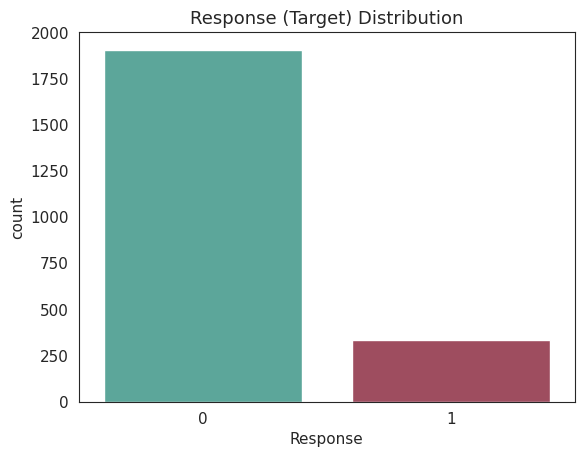

In [0]:
sns.countplot(x="Response", data=dfModel_pd, palette=["#4FB3A2", "#AB4057"])
plt.title("Response (Target) Distribution")
plt.show()

## Step 3: Final dataset, model training, and performance metrics

In [0]:
# Features selected based on domain knowledge and exploratory analysis
features = [
    'Kidhome','Teenhome','Income_filled',
    'MntFishProducts','MntMeatProducts','MntFruits',
    'MntSweetProducts','MntWines','MntGoldProds',
    'NumDealsPurchases','NumCatalogPurchases',
    'NumStorePurchases','NumWebPurchases',
    'NumWebVisitsMonth','Recency',
    'Divorced','Married','Single','Together','Widow',
    '2n Cycle','Basic','Graduation','Master','PhD'
]

X = dfModel_pd[features]
y = dfModel_pd['Response']  # TARGET

**Train/Test Data Split Strategy**:
A stratified train-test split was used to preserve the original proportion of responders and non-responders in both the training and test sets.

Given the class imbalance in the dataset (approximately 15% positive responses), stratification is critical to ensure that model evaluation metrics are reliable
and representative of real-world performance.
- 85% Non-Responders
- 15% Responders

We should see in our test and train sets the same proportion:
- Train set: 85% / 15%
- Test set:  85% / 15%

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

Given the relatively small dataset (~2,500 rows) and the tabular nature of the data, tree-based gradient boosting models are well-suited for this problem.

XGBoost was chosen due to:
- Strong performance on small tabular datasets
- Ability to capture non-linear relationships and feature interactions
- Robustness to correlated features
- Compatibility with SHAP for interpretability

In [0]:
# Teste final (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Validação (20% do total original)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)


xgb_model = XGBClassifier(
    n_estimators=1000,          # early stopping controla
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    random_state=42,
    early_stopping_rounds=10,
    eval_metric="logloss"  
)

xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)

print(f"Modelo parou na árvore: {xgb_model.best_iteration}")

O modelo parou na árvore: 113


In [0]:
xgb_model = XGBClassifier(
    n_estimators=200, # optimized value found was 113, but I entered 200
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [0]:
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

**Business and Performance Metrics:** Confusion Matrix
- True Positives (TP): Customers who received the campaign and responded -> 18
- False Positives (FP): Customers who received the campaign but did not respond (cost) -> 7
- False Negatives (FN): Missed opportunities -> 51
- True Negatives (TN): Customers correctly not targeted -> 372

The Confusion Matrix shows that the model is highly conservative, with a 98% True Negative Rate and a very low False Positive Rate (1.8%), which helps control campaign costs. While it misses some potential responders, the customers it does target have a high likelihood of conversion, making the model well aligned with a profit-oriented marketing strategy after a loss-making campaign.

- False Positive Rate (`FP/FP+TN`): 1.8%
- True Negative Rate (`TN/FP+TN`): 98%
- True Positive Rate (`TP/TP+FN`): 72%

![](https://towardsdatascience.com/wp-content/uploads/2020/09/1k6qWU7kXeCfk2KK2y3Cysg.png)

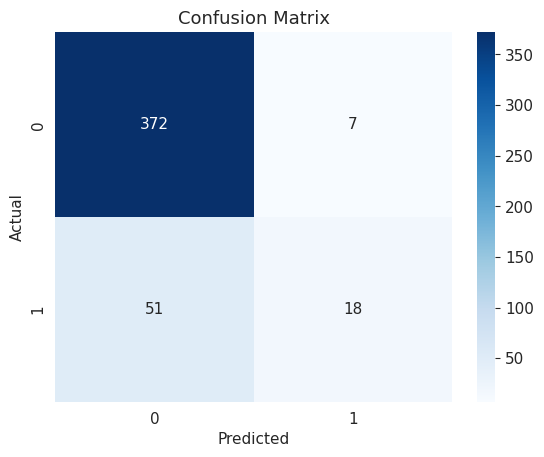

In [0]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**Business and Performance Metrics:** Precision, Recall and F1-Score

Precision is particularly important in this context, as it reflects how many contacted customers actually convert, directly impacting campaign profit.

For campaign responders, the model achieved:
- Precision: 61%
- Recall: 28%
- F1-score: 39%

The relatively high precision indicates that when the model predicts a customer will respond, it is correct in most cases.
The lower recall reflects a conservative strategy, prioritizing fewer but higher-quality contacts rather than maximizing reach.
**This trade-off aligns with a profit-maximization strategy, where avoiding unnecessary campaign exposure is more valuable than contacting all potential responders, given that each contacted customer has an associated cost.**



In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       381
           1       0.61      0.28      0.39        67

    accuracy                           0.87       448
   macro avg       0.75      0.63      0.66       448
weighted avg       0.84      0.87      0.84       448



**Business and Performance Metrics:** ROC AUC Curve

ROC AUC measures the model’s ability to rank responders above non-responders, independently of the chosen threshold.
The result of 0.849 indicates an 84.9% probability that the model will correctly rank a randomly chosen positive example above a negative one.

When correlating the ROC AUC with the Confusion Matrix, **it becomes clear that the dataset is imbalanced, with far more non-responders (0) than responders (1)** - as already mentioned in the CMD `Step 2 - Final Count of the New Target`. This leads to a common model behavior:

- High Specificity: the model is highly effective at identifying non-responders.
- Low Sensitivity (Recall): the model struggles to capture all positive cases. Out of 69 positive customers (51 FN + 18 TP), only 18 were correctly identified.

Despite this, the high ROC AUC shows that the model does distinguish well between the two classes, but applies a very conservative decision rule, predicting a positive response only when it is highly confident. **One way to address this trade-off is to adjust the decision threshold** (instead of using the default 0.5 that I used), allowing the model to capture more potential responders while still balancing campaign costs and profitability.

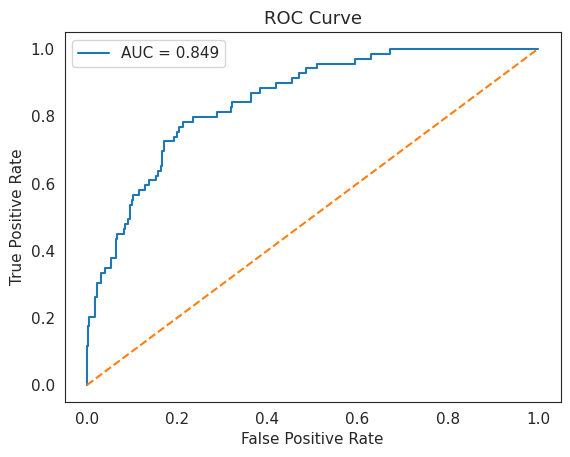

In [0]:
auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()


**Business and Performance Metrics:** SHAP

The SHAP summary plot shows which features most influence the prediction and whether they increase or decrease the probability of response.
SHAP analysis shows that customer recency is the most influential feature. Customers with lower recency (more recent interactions) have a significantly higher probability of responding to campaigns.

Other strong positive drivers include:
- Number of catalog purchases
- Number of web visits per month
- Spending on wine, meat and gold products
- Higher income levels

**Opportunity:** 
- Feature Engineering: `Income_filled` and `MntWines` are also important features. To build an even better model, I could try creating a `Total Spending` variable by summing all amount features to check whether this improves model performance and precision.

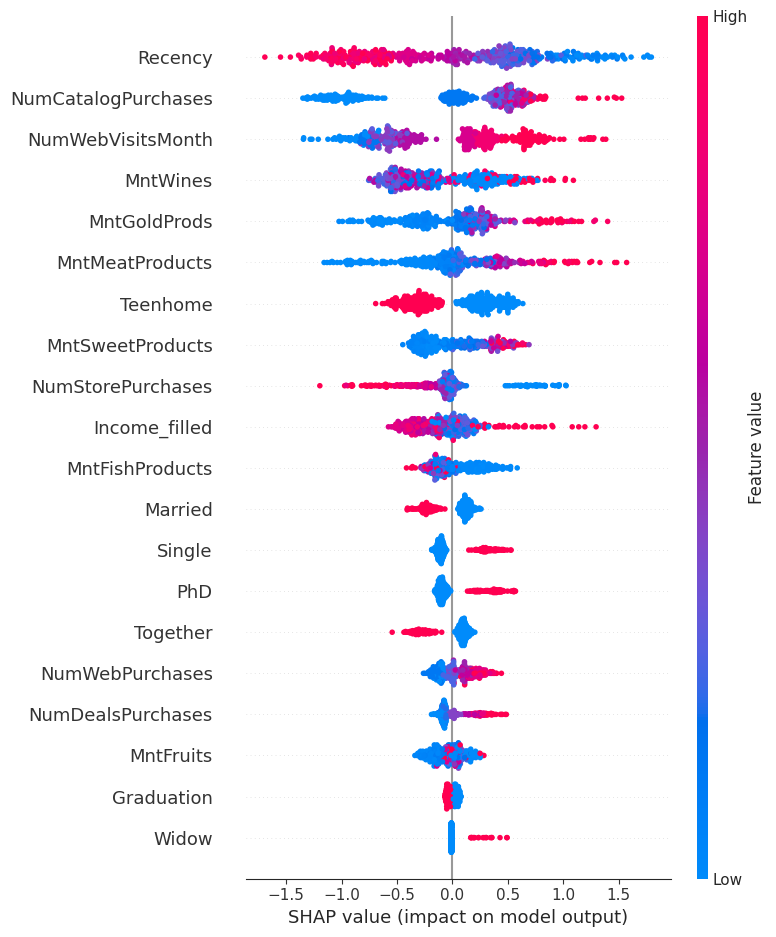

In [0]:
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

This allows explaining individual decisions, which is critical for trust and business alignment.

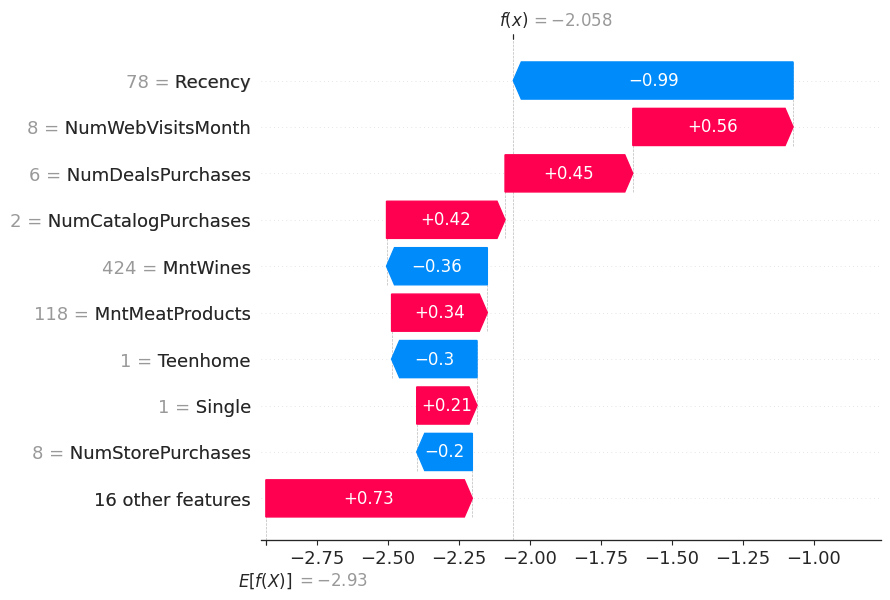

In [0]:
shap.plots.waterfall(shap_values[0])

# Profit

**From the Pilot Campaign**

- 2.240 customers
- Total cost: 6.720 MU
- Total revenue: 3.674 MU
- Profit: −3.046 MU
- Success rate: 15%

**Metrics:**
- Cost per customer = 6.720 / 2.240 = 3.0 MU
- Number of responders = 15% × 2.240 = 336 customers
- Revenue per responder = 3.674 / 336 = 10.9 MU

**From the Tested Data**
- Customers reach:	25 (TP: 18 + FP: 7)
- Total cost:	75 MU (25 customers × 3.0 MU)
- Total revenue: 196.2 MU (18 TPs × 10.9 MU)
- Profit:	+121.2 MU

# Final Thoughts & Opportunities for Improvement

This project delivered business-oriented solution aligned with the proposed deliverables:

- **Comprehensive exploratory analysis:**  
  The data exploration provided clear insights into customer behavior, identifying key drivers of spending and campaign response such as income, recency, education level and product preferences. These insights helped build intuition and guided feature selection for modeling.

- **Profit-oriented predictive modeling:**  
  A classification model was developed to predict the probability of campaign response, with a strong focus on **supporting profit-oriented decision making rather than optimizing accuracy alone**. Given the absence of explicit cost and revenue information in the dataset, the model was evaluated using metrics such as precision, recall, ROC AUC and the confusion matrix, with particular attention to false positives, which represent unnecessary campaign costs.

- **Interpretability and business transparency:**  
  The use of SHAP ensured that model predictions are explainable at both global and individual levels, supporting trust, stakeholder alignment and practical decision-making by the marketing team.


### Potential Improvements and Next Steps

- **Threshold Optimization for Profit:**  
  Adjust the classification threshold (currently at 0.5) to find the "sweet spot" that maximizes the Expected Value. Since the model has high precision but moderate recall, lowering the threshold could capture more responders and increase total campaign revenue.

- **Addressing Class Imbalance:**  
  Implement advanced techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or adjust the `scale_pos_weight` parameter in the XGBoost model to help it better identify the minority class (responders), reducing the number of False Negatives found in the current confusion matrix.

- **Feature Engineering & Enrichment:**  
  Create synthetic features such as `Total Spend Share` (proportion of income spent on products) to capture deeper behavioral patterns that Recency alone might miss.

- **Customer Segmentation:** 
  Use the segmented customers for special offers. For example, a "High-Value/High-Recency" segment could receive aggressive win-back offers.
